In [9]:
import json 
from collections import Counter
from tqdm import tqdm 
from colorama import Style,Fore
import os
from dotenv import load_dotenv
load_dotenv()

True

In [10]:
import importlib
import utils  # or whatever your module is called
importlib.reload(utils)

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

<module 'utils' from '/teamspace/studios/this_studio/AgroTube/filtering/scripts/utils.py'>

In [11]:
from utils import openJson,saveJson

## Refining 1

- Refine the language field of the videos

In [ ]:
from utils import RefineLanguage1


In [ ]:
RefineLanguage1()

In [2]:
with open("../jsons/videosR1.json", "r", encoding="utf-8") as file:
    videosR1 = json.load(file)
len(videosR1)

6859

In [3]:
langue_counter = Counter(video['langue'] for video in videosR1)
print("Toutes les valeurs uniques de langue avec leur nombre d'occurrences :")
for langue, count in langue_counter.items():
    print(f"- {langue} : {count}")


Toutes les valeurs uniques de langue avec leur nombre d'occurrences :
- fr : 6276
- autre : 583


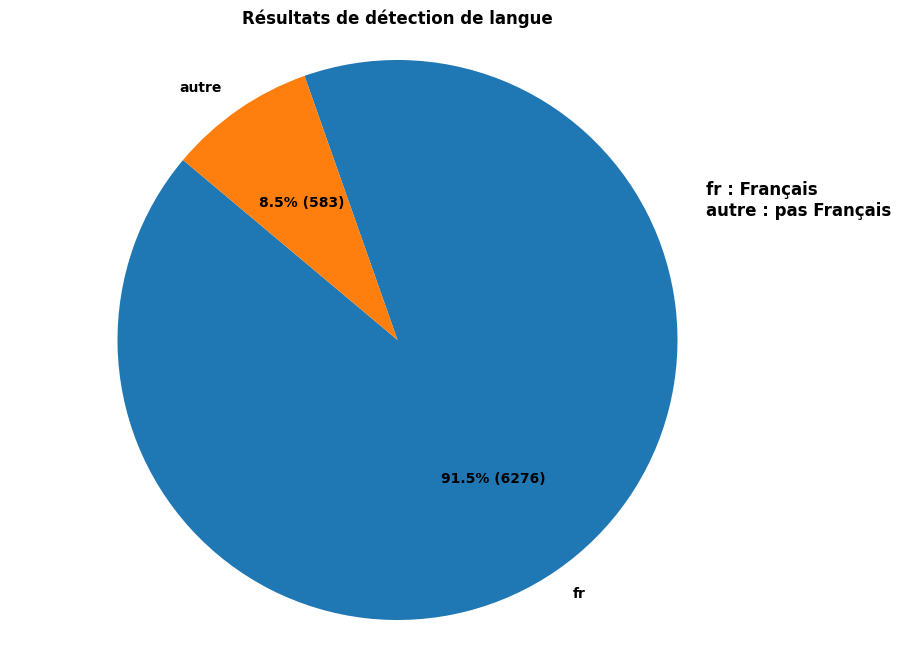

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

langue_counter = Counter(video['langue'] for video in videosR1)
labels = list(langue_counter.keys())
sizes = list(langue_counter.values())
total = sum(sizes)

def make_label(pct, allvals):
    absolute = int(round(pct / 100. * total))
    return f'{pct:.1f}% ({absolute})'

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: make_label(p, sizes), startangle=140, textprops={'fontweight': 'bold'})
plt.axis('equal')
plt.title("Résultats de détection de langue", fontweight='bold')

plt.text(1.1, 0.5, "fr : Français\nautre : pas Français", fontsize=12, fontweight='bold', va='center')

plt.show()


## Refining 2

- Add the Localisation Information

In [ ]:
from utils import RefineLanguage2

In [ ]:
RefineLanguage2()

In [11]:
with open("../jsons/videosR2.json", "r", encoding="utf-8") as file:
    videosR2 = json.load(file)
len(videosR2)

6859

In [12]:
langue_counter = Counter(video['langue'] for video in videosR2)
print("Toutes les valeurs uniques de langue avec leur nombre d'occurrences :")
for langue, count in sorted(langue_counter.items(), key=lambda x: x[1], reverse=True):
    print(f"- {langue} : {count}")


Toutes les valeurs uniques de langue avec leur nombre d'occurrences :
- fr-FR : 4312
- fr : 1332
- autre : 583
- fr-CA : 229
- fr-BE : 112
- fr-CH : 88
- fr-US : 49
- fr-MA : 35
- fr-NC : 14
- fr-PT : 14
- fr-DE : 11
- fr-IT : 10
- fr-RE : 8
- fr-ES : 7
- fr-SN : 6
- fr-MQ : 6
- fr-DZ : 5
- fr-CI : 4
- fr-GB : 4
- fr-AR : 2
- fr-NL : 2
- fr-CM : 2
- fr-ZA : 2
- fr-PF : 2
- fr-TH : 2
- fr-GP : 2
- fr-AE : 2
- fr-TR : 1
- fr-TG : 1
- fr-HK : 1
- fr-MU : 1
- fr-RU : 1
- fr-IN : 1
- fr-SA : 1
- fr-KE : 1
- fr-KR : 1
- fr-LU : 1
- fr-IE : 1
- fr-LK : 1
- fr-BJ : 1
- fr-TN : 1


In [13]:
total = len(videosR2)

count_fr = sum(1 for video in videosR2 if video['langue'] == 'fr')
count_frFR = sum(1 for video in videosR2 if video['langue'] == 'fr-FR')
count_fr_autre = sum(1 for video in videosR2 if video['langue'].startswith('fr') and video['langue'] not in ['fr', 'fr-FR'])
count_autre = total - (count_fr + count_frFR + count_fr_autre)

print(f"Total de vidéos : {total}")
print(f"- fr       : {count_fr} ({count_fr / total:.2%})")
print(f"- fr-FR    : {count_frFR} ({count_frFR / total:.2%})")
print(f"- fr-autre : {count_fr_autre} ({count_fr_autre / total:.2%})")
print(f"- autre    : {count_autre} ({count_autre / total:.2%})")

Total de vidéos : 6859
- fr       : 1332 (19.42%)
- fr-FR    : 4312 (62.87%)
- fr-autre : 632 (9.21%)
- autre    : 583 (8.50%)


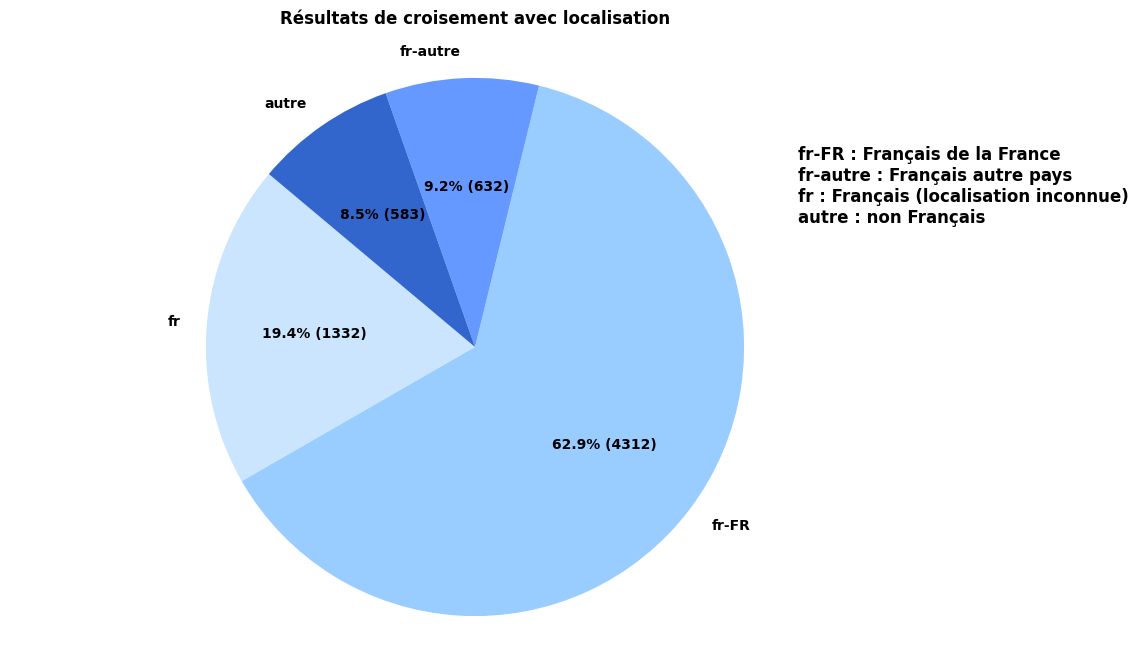

In [22]:
import matplotlib.pyplot as plt

total = len(videosR2)

count_fr = sum(1 for video in videosR2 if video['langue'] == 'fr')
count_frFR = sum(1 for video in videosR2 if video['langue'] == 'fr-FR')
count_fr_autre = sum(1 for video in videosR2 if video['langue'].startswith('fr') and video['langue'] not in ['fr', 'fr-FR'])
count_autre = total - (count_fr + count_frFR + count_fr_autre)

labels = ['fr', 'fr-FR', 'fr-autre', 'autre']
sizes = [count_fr, count_frFR, count_fr_autre, count_autre]

colors = ['#cce5ff', '#99ccff', '#6699ff', '#3366cc']

def make_label(pct, allvals):
    absolute = int(round(pct / 100. * total))
    return f'{pct:.1f}% ({absolute})'

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: make_label(p, sizes),
        startangle=140, textprops={'fontweight': 'bold'})
plt.axis('equal')

plt.title("Résultats de croisement avec localisation", fontweight='bold', pad=20)

plt.subplots_adjust(top=0.85)

# Ajouter les explications à côté du graphique
plt.text(1.2, 0.6, "fr-FR : Français de la France\nfr-autre : Français autre pays\nfr : Français (localisation inconnue)\nautre : non Français",
         fontsize=12, fontweight='bold', va='center')

plt.show()


In [23]:
4312+1332+632

6276

## Refining 3

- Get the localisation information for 'fr' videos :
  - Try to explore the video description+Title and Bio of the corresponding channel.

### 1.Seperate Channels with unknown country 

In [12]:
channels = openJson("../../collecting/jsons/channels.json")
len(channels)

3309

In [13]:
channels_location_Unknown = []
for channel in channels :
    if channel['localisation']=="":
        channels_location_Unknown.append(channel)

saveJson("../jsons/channels_location_Unknown.json",channels_location_Unknown)
len(channels_location_Unknown)


 json saved


1077

### 2.Refine Channels Locations

Test

In [13]:
from utils import RefineAllChannels

In [14]:
RefineAllChannels()

Channels-Locations Refining...:   3%|▎         | 30/1077 [00:47<14:02,  1.24it/s] 

Error with GeoCoding


Channels-Locations Refining...:   9%|▉         | 100/1077 [02:43<23:16,  1.43s/it] 


 json saved


Channels-Locations Refining...:  18%|█▊        | 192/1077 [05:09<24:31,  1.66s/it]

Error with GeoCoding


Channels-Locations Refining...:  19%|█▊        | 200/1077 [05:31<20:34,  1.41s/it]  


 json saved


/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 397 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  19%|█▉        | 205/1077 [05:42<26:36,  1.83s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 838 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  19%|█▉        | 207/1077 [05:48<31:07,  2.15s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 11347 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  21%|██      


 json saved


/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 451 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  29%|██▊       | 308/1077 [09:00<27:13,  2.12s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 679 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  31%|███       | 329/1077 [09:27<08:10,  1.53it/s]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 17903 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  35%|███▍    


 json saved


Channels-Locations Refining...:  38%|███▊      | 405/1077 [11:14<15:25,  1.38s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 456 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  39%|███▊      | 416/1077 [11:33<18:45,  1.70s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 778 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  40%|████      | 432/1077 [12:10<29:55,  2.78s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 2305 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)


 json saved


Channels-Locations Refining...:  48%|████▊     | 518/1077 [14:25<11:08,  1.20s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 453 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  49%|████▉     | 533/1077 [14:49<15:18,  1.69s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 412 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  53%|█████▎    | 575/1077 [15:41<06:19,  1.32it/s]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 738 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)}


 json saved


Channels-Locations Refining...:  58%|█████▊    | 624/1077 [16:49<12:49,  1.70s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 386 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  58%|█████▊    | 626/1077 [16:53<13:07,  1.75s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 552 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  58%|█████▊    | 630/1077 [17:02<15:21,  2.06s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 472 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)}


 json saved


Channels-Locations Refining...:  67%|██████▋   | 723/1077 [19:39<10:13,  1.73s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 385 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  68%|██████▊   | 737/1077 [19:58<06:55,  1.22s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 497 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  69%|██████▉   | 742/1077 [20:10<14:27,  2.59s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 401 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)}


 json saved


Channels-Locations Refining...:  76%|███████▌  | 821/1077 [22:29<14:29,  3.40s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 549 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  81%|████████  | 867/1077 [23:23<02:40,  1.31it/s]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 753 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  82%|████████▏ | 885/1077 [23:43<04:14,  1.33s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 920 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)}


 json saved


/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 550 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  84%|████████▎ | 901/1077 [24:15<05:47,  1.98s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 1188 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  84%|████████▍ | 909/1077 [24:29<05:47,  2.07s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 523 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  85%|████████▌


 json saved


Channels-Locations Refining...:  93%|█████████▎| 1002/1077 [26:51<03:16,  2.61s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 1213 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  93%|█████████▎| 1006/1077 [26:59<02:09,  1.82s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 391 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  95%|█████████▌| 1024/1077 [27:37<01:23,  1.57s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 557 has been truncated to 384
  warnings.warn(f"Sentence of length {len(toke


 json saved


- Temps moyenne de processus avec CPU 

In [7]:
data = openJson("../jsons/channels_location_Unknown_2.json")
localisation_times = [
    chaine['localisationTime(s)']
    for chaine in data
    if 'localisationTime(s)' in chaine and isinstance(chaine['localisationTime(s)'], (int, float))
]

if localisation_times:
    moyenne = sum(localisation_times) / len(localisation_times)
    print(f"Temps moyen de localisation : {moyenne:.2f} secondes")
else:
    print("Aucun temps de localisation valide trouvé.")

Temps moyen de localisation : 2.83 secondes


### 1.Seperate These videos 

In [ ]:
with open("../jsons/videosR2.json", "r", encoding="utf-8") as file:
    videosR2 = json.load(file)
videosfr = []
for video in videosR2:
    if video['langue']=='fr':
        videosfr.append(video)
with open("../jsons/videosfr.json", "w", encoding="utf-8") as f:
    json.dump(videosfr, f, ensure_ascii=False, indent=2)
    print(Style.BRIGHT+Fore.GREEN+'\n json saved'+Style.RESET_ALL)
    print(Style.BRIGHT+Fore.YELLOW+f'\n json length is : {len(videosfr)}'+Style.RESET_ALL)

### 2. Get the location by using metadata:

In [ ]:
# Get the Context first
import importlib
import utils  # or whatever your module is called
importlib.reload(utils)

from utils import getContextAll


In [ ]:
getContextAll()

### 3.NER

- with spacy (not realy accurate)

In [ ]:
import spacy

nlp = spacy.load("fr_core_news_lg")

In [ ]:
context = """
Le bio de la chaine : \n \n        \n###############\n        \nDescription : Hello ! Aujourd’hui Bruno nous invite à questionner l'usage que faisons de notre habitat et nous propose de réduire nos surfaces de vie tout en gardant notre confort, de construire notre maison sans faire de prêt bancaire sur 20 ans. Et si on voyait dans le fait de construire notre maison plus qu'un défi, un cheminement, une expérience humaine, un accomplissement ?\nDécouvrez la construction d’un habitat autonome avec une structure bois, isolation paille, enduit terre de 24m2 avec cuisine, séjour, chambre et salle de bain pour 5000€ ! \nPrenez bien soin de vous.  \nJe vous embrasse, \n\nA bientôt 🌸 \n\nSarah \n\n\n\nLe site internet d’Alter’éco 30 : https://bit.ly/37pw1uj \n\n#OurInnerTravels #Autonomie #Habitat #Maison #HabitatAutonome #Ecologie \n\n\nRetrouve moi aussi sur : \n🎙PODCAST : https://anchor.fm/our-inner-travels\n\n📸 I N S T A G R A M : https://instagram.com/ourinnertravels \n✍️ B L O G : https://ourinnertravels.com \n📸 FACEBOOK : https://www.facebook.com/OurInnerTravels \n💕 Abonne-toi à la chaine : https://bit.ly/2PUxikr \n💌 Me Contacter 💌: contact@ourinnertravels.com\n        \n        \n###############\n        \nDescription : Hello, Aujourd’hui je vous retrouve dans la première partie d’une série de 5 entretiens avec Bruno sur le thème : L’écologie et l’alternativité comme invitation à trouver un sens à la vie.\nPartie 1 : Echovert, la construction d’un lieu alternatif, autonome et écologique\nPartie 2 : Vivre de façon alternative, les joies\nPartie 3 : Vivre de façon alternative, les défis \nPartie 4 : L’écologie, une invitation à trouver un sens à la vie\nPartie 5 : Les 3 kiffs de Bruno\n\nVous préférez écouter la vidéo sous format podcast ? C'est ici : https://bit.ly/3gmy5ZF\n\nEn octobre, de retour de voyage la réadaptation à la vie parisienne est difficile, est-ce peut-être car je n’ai pas envie de me réadapter, que je n’y vois plus de sens ? Je pars donc en Camargue, à une demi-heure de Nîmes et passe un mois dans un éco-lieu à la recherche de sens, de rencontres, de personnes qui partagent mes idées et mes aspirations. Bruno et Anne ont créé ce lieu de vie alternatif où naissent inventions respectueuses de l’environnement et expérimentations d’outils pour l’autonomie alimentaire et énergétique. Avec Bruno, on a commencé par parler de ce lieu de vie alternatif et de ce qu’implique le fait de vivre en communauté. On s’est aussi demander comment se reconnecter à soi et aux autres dans un monde qui semble parfois déconnecté du réel. Au fil de nos paroles, on en est finalement venu à se questionner sur le sens de la vie, et en quoi le fait de cultiver son écologie intérieure est peut-être la première forme d’engagement écologique à avoir. Aujourd’hui je vous propose de partir en voyage intérieur grâce à Bruno. L’écologie et l’alternativité comme invitation à trouver un sens à la vie.\n\nA bientôt 🌸 \n\nSarah \n\nLe site internet d’Alter’éco 30 : https://bit.ly/37pw1uj \n\nRetrouve moi aussi sur : \n🎙PODCAST : https://anchor.fm/our-inner-travels\n📸 I N S T A G R A M : https://instagram.com/ourinnertravels \n✍️ B L O G : https://ourinnertravels.com \n📸 FACEBOOK : https://www.facebook.com/OurInnerTravels \n💕 Abonne-toi à la chaine : https://bit.ly/2PUxikr \n💌 Me Contacter 💌: contact@ourinnertravels.com\n        \n        \n###############\n\n        titre : Habitat autonome et autoconstruction\n        \n        \n###############\n\n        titre : PARLONS #2 - 1 : Echovert, la construction d’un lieu alternatif, autonome et écologique - Bruno\n       

"""

print(context)

In [ ]:
doc = nlp(context)

for ent in doc.ents:
    if ent.label_ == "LOC":
        print(f"{ent}  :  {ent.label_}" )

In [3]:
from utils import RefineLanguage3

In [ ]:
RefineLanguage3()

 40%|███▉      | 527/1332 [58:44<3:35:55, 16.09s/it]


--FR--

{
  "Bergouey": "FR",
  "Pays basque": "ES",
  "Autour": "IT",
  "Sologne": "FR",
  "A": "AR",
  "Angus": "GB",
  "France": "FR",
  "Krebsbach": "DE",
  "Sud": "HT",
  "Haute-Loire": "FR",
  "Auvergne": "CA",
  "Brioude": "FR",
  "Paris": "FR",
  "Lindes": "FR",
  "rue Guynemer": "FR",
  "rue Beaubourg": "FR",
  "Terre": "ET",
  "Gilles": "FR",
  "Les": "FR",
  "Chaque": "GT",
  "Bordeaux": "FR",
  "Petit-fils": "FR",
  "ferme Pauline": "BE",
  "Bordeaux-Métropole": "FR",
  "FUP": "IT",
  "Mérignac": "FR",
  "Et": "ET",
  "Bachats": "FR",
  "Moselle": "FR",
  "MSV": "US",
  "Cagnolle": "FR",
  "Cette": "FR",
  "ferme de Cagnolle": "FR",
  "Belvès": "FR",
  "Périgord": "FR",
  "Ille-et-Vilaine": "FR",
  "Rennes": "FR",
  "Champ de céréales": "FR",
  "Vosges": "FR",
  "Allemagne": "DE",
  "Champs de Bray": "FR",
  "Limousin": "FR",
  "Haute-Saône": "FR",
  "Hongrie": "HU",
  "L’éleveur": "FR",
  "Côte d’Or": "FR",
  "Bourgogne": "FR",
  "Lignières": "FR",
  "Côtes d'Armor": "FR"

 40%|███▉      | 530/1332 [58:47<2:21:56, 10.62s/it]


--CI--

{
  "100% AUTONOME EN EAU": "CI"
}


 40%|████      | 534/1332 [58:48<1:15:31,  5.68s/it]


--FR--

{
  "forêt de Brocéliande": "FR"
}

--unknown--

{}

--unknown--

{}

--unknown--

{}

--unknown--

{}


 40%|████      | 536/1332 [58:52<1:01:02,  4.60s/it]


--FR--

{
  "Minervois": "FR"
}


 40%|████      | 537/1332 [58:59<1:07:12,  5.07s/it]


--FR--

{
  "Boulogne-Billancourt": "FR",
  "Hauts-de-Seine": "FR",
  "L'eau": "FR",
  "Boulonnais": "FR"
}

--unknown--

{}


 40%|████      | 539/1332 [59:00<46:18,  3.50s/it]  


--unknown--

{}


 41%|████      | 540/1332 [59:02<43:22,  3.29s/it]


--US--

{
  "Or": "US",
  "Pays Basque": "ES"
}

--unknown--

{}


 41%|████      | 544/1332 [59:07<26:10,  1.99s/it]


--AR--

{
  "A": "AR",
  "J'avais": "FR",
  "Donc": "CA"
}

--unknown--

{}

--unknown--

{}


 41%|████      | 545/1332 [59:10<29:44,  2.27s/it]


--unknown--

{}


 41%|████      | 548/1332 [59:11<16:50,  1.29s/it]


--FR--

{
  "Ardèche": "FR"
}

--unknown--

{}

--unknown--

{}

--unknown--

{}


 41%|████▏     | 550/1332 [59:24<40:15,  3.09s/it]


--FR--

{
  "Maylis": "FR",
  "Lucia": "SI",
  "la France": "US",
  "Maroc": "MA",
  "Mauritanie": "MR",
  "Sénégal": "SN",
  "Brésil": "BR",
  "Paraguay": "PY",
  "Savoie": "FR",
  "Haute Savoie": "FR",
  "France": "FR"
}


 41%|████▏     | 551/1332 [59:27<39:32,  3.04s/it]


--FR--

{
  "Cette": "FR"
}


 41%|████▏     | 552/1332 [59:29<37:39,  2.90s/it]


--PL--

{
  "E": "PL"
}


 42%|████▏     | 553/1332 [59:32<35:38,  2.74s/it]


--FR--

{
  "Trièves": "FR"
}

--unknown--

{}

--unknown--

{}

--unknown--

{}


 42%|████▏     | 557/1332 [59:34<18:54,  1.46s/it]


--AR--

{
  "A": "AR"
}


 42%|████▏     | 558/1332 [59:35<19:12,  1.49s/it]


--FR--

{
  "Paris La Défense": "FR"
}

--unknown--

{}


 42%|████▏     | 561/1332 [59:37<12:51,  1.00s/it]


--FR--

{
  "Hauts-de-France": "FR"
}

--unknown--

{}


 42%|████▏     | 562/1332 [59:44<29:45,  2.32s/it]


--FR--

{
  "Vannes": "FR",
  "Lorient": "FR",
  "Pontivy": "FR",
  "A": "AR"
}


 42%|████▏     | 563/1332 [1:00:03<1:21:25,  6.35s/it]


--FR--

{
  "Côte St André": "FR",
  "Terres Froides": "FR",
  "le Rhône": "FR",
  "Loire": "FR",
  "Rhône": "FR",
  "Loire-Atlantique": "FR",
  "Ille-et-Vilaine": "FR",
  "Pointel": "FR",
  "Basse Normandie": "FR",
  "Centre-Val de Loire": "FR",
  "Normandie": "FR"
}

--unknown--

{}


 42%|████▏     | 565/1332 [1:00:05<53:34,  4.19s/it]  


--FR--

{
  "Palais des Congrès de Paris": "FR"
}


 42%|████▏     | 566/1332 [1:00:09<51:35,  4.04s/it]


--FR--

{
  "La Ferme en Coton": "FR",
  "Auch": "FR",
  "Gers": "FR"
}


 43%|████▎     | 567/1332 [1:01:55<6:05:26, 28.66s/it]


--FR--

{
  "Bergouey": "FR",
  "Pays basque": "ES",
  "Autour": "IT",
  "Sologne": "FR",
  "A": "AR",
  "Angus": "GB",
  "France": "FR",
  "Krebsbach": "DE",
  "Sud": "HT",
  "Haute-Loire": "FR",
  "Auvergne": "CA",
  "Brioude": "FR",
  "Paris": "FR",
  "Lindes": "FR",
  "rue Guynemer": "FR",
  "rue Beaubourg": "FR",
  "Terre": "ET",
  "Gilles": "FR",
  "Les": "FR",
  "Chaque": "GT",
  "Bordeaux": "FR",
  "Petit-fils": "FR",
  "ferme Pauline": "BE",
  "Bordeaux-Métropole": "FR",
  "FUP": "IT",
  "Mérignac": "FR",
  "Et": "ET",
  "Bachats": "FR",
  "Moselle": "FR",
  "MSV": "US",
  "Cagnolle": "FR",
  "Cette": "FR",
  "ferme de Cagnolle": "FR",
  "Belvès": "FR",
  "Périgord": "FR",
  "Ille-et-Vilaine": "FR",
  "Rennes": "FR",
  "Champ de céréales": "FR",
  "Vosges": "FR",
  "Allemagne": "DE",
  "Champs de Bray": "FR",
  "Limousin": "FR",
  "Haute-Saône": "FR",
  "Hongrie": "HU",
  "L’éleveur": "FR",
  "Côte d’Or": "FR",
  "Bourgogne": "FR",
  "Lignières": "FR",
  "Côtes d'Armor": "FR"

 43%|████▎     | 569/1332 [1:01:59<3:45:21, 17.72s/it]


--CA--

{
  "Québec": "CA",
  "Maritimes": "FR"
}


 43%|████▎     | 570/1332 [1:02:03<3:06:21, 14.67s/it]


--FR--

{
  "Lyon": "FR",
  "Un": "MD",
  "Occitanie": "FR"
}


 43%|████▎     | 571/1332 [1:02:06<2:31:42, 11.96s/it]


--FR--

{
  "Rouen": "FR",
  "Dieppe": "FR"
}


 43%|████▎     | 572/1332 [1:02:18<2:30:02, 11.85s/it]


--FR--

{
  "de France": "FR",
  "Alpes": "IT",
  "Vercors": "FR",
  "ville de Paris": "BR",
  "Paris": "FR"
}

--unknown--

{}

--unknown--

{}


 43%|████▎     | 575/1332 [1:02:19<1:13:29,  5.83s/it]


--FR--

{
  "Pluduno": "FR"
}


 43%|████▎     | 576/1332 [1:02:23<1:08:12,  5.41s/it]


--CA--

{
  "Québec": "CA",
  "Maritimes": "FR"
}

--unknown--

{}


 43%|████▎     | 578/1332 [1:02:24<46:10,  3.67s/it]  


--unknown--

{}

--unknown--

{}


 44%|████▎     | 580/1332 [1:04:12<4:21:47, 20.89s/it]


--FR--

{
  "Bergouey": "FR",
  "Pays basque": "ES",
  "Autour": "IT",
  "Sologne": "FR",
  "A": "AR",
  "Angus": "GB",
  "France": "FR",
  "Krebsbach": "DE",
  "Sud": "HT",
  "Haute-Loire": "FR",
  "Auvergne": "CA",
  "Brioude": "FR",
  "Paris": "FR",
  "Lindes": "FR",
  "rue Guynemer": "FR",
  "rue Beaubourg": "FR",
  "Terre": "ET",
  "Gilles": "FR",
  "Les": "FR",
  "Chaque": "GT",
  "Bordeaux": "FR",
  "Petit-fils": "FR",
  "ferme Pauline": "BE",
  "Bordeaux-Métropole": "FR",
  "FUP": "IT",
  "Mérignac": "FR",
  "Et": "ET",
  "Bachats": "FR",
  "Moselle": "FR",
  "MSV": "US",
  "Cagnolle": "FR",
  "Cette": "FR",
  "ferme de Cagnolle": "FR",
  "Belvès": "FR",
  "Périgord": "FR",
  "Ille-et-Vilaine": "FR",
  "Rennes": "FR",
  "Champ de céréales": "FR",
  "Vosges": "FR",
  "Allemagne": "DE",
  "Champs de Bray": "FR",
  "Limousin": "FR",
  "Haute-Saône": "FR",
  "Hongrie": "HU",
  "L’éleveur": "FR",
  "Côte d’Or": "FR",
  "Bourgogne": "FR",
  "Lignières": "FR",
  "Côtes d'Armor": "FR"

 44%|████▎     | 581/1332 [1:06:00<7:55:16, 37.97s/it]


--FR--

{
  "Bergouey": "FR",
  "Pays basque": "ES",
  "Autour": "IT",
  "Sologne": "FR",
  "A": "AR",
  "Angus": "GB",
  "France": "FR",
  "Krebsbach": "DE",
  "Sud": "HT",
  "Haute-Loire": "FR",
  "Auvergne": "CA",
  "Brioude": "FR",
  "Paris": "FR",
  "Lindes": "FR",
  "rue Guynemer": "FR",
  "rue Beaubourg": "FR",
  "Terre": "ET",
  "Gilles": "FR",
  "Les": "FR",
  "Chaque": "GT",
  "Bordeaux": "FR",
  "Petit-fils": "FR",
  "ferme Pauline": "BE",
  "Bordeaux-Métropole": "FR",
  "FUP": "IT",
  "Mérignac": "FR",
  "Et": "ET",
  "Bachats": "FR",
  "Moselle": "FR",
  "MSV": "US",
  "Cagnolle": "FR",
  "Cette": "FR",
  "ferme de Cagnolle": "FR",
  "Belvès": "FR",
  "Périgord": "FR",
  "Ille-et-Vilaine": "FR",
  "Rennes": "FR",
  "Champ de céréales": "FR",
  "Vosges": "FR",
  "Allemagne": "DE",
  "Champs de Bray": "FR",
  "Limousin": "FR",
  "Haute-Saône": "FR",
  "Hongrie": "HU",
  "L’éleveur": "FR",
  "Côte d’Or": "FR",
  "Bourgogne": "FR",
  "Lignières": "FR",
  "Côtes d'Armor": "FR"

 44%|████▎     | 582/1332 [1:06:08<6:32:51, 31.43s/it]


--FR--

{
  "France": "FR",
  "Gers": "FR",
  "Eure": "FR",
  "Yonne": "FR",
  "Lot": "FR",
  "Ille": "FR",
  "Vilaine": "FR"
}

--unknown--

{}


 44%|████▍     | 584/1332 [1:06:09<4:04:01, 19.57s/it]


--FR--

{
  "Peyruis": "FR"
}


 44%|████▍     | 585/1332 [1:06:11<3:14:14, 15.60s/it]


--BE--

{
  "Belgique": "BE"
}


 44%|████▍     | 586/1332 [1:06:20<2:56:08, 14.17s/it]


--FR--

{
  "Côtes-d’Armor": "FR",
  "Pékin": "CN",
  "de France": "FR",
  "Paris": "FR",
  "région Centre": "TG"
}


 44%|████▍     | 587/1332 [1:06:25<2:25:53, 11.75s/it]


--FR--

{
  "Moulin Laurentais": "FR",
  "Huisseau": "FR",
  "Mauves": "FR",
  "LAURENTAIS": "FR"
}

--unknown--

{}


 44%|████▍     | 589/1332 [1:06:27<1:31:06,  7.36s/it]


--FR--

{
  "Vaucluse": "FR",
  "Alpes-de-Haute-Provence": "FR"
}


 44%|████▍     | 590/1332 [1:06:30<1:16:47,  6.21s/it]


--FR--

{
  "Vaucluse": "FR",
  "Alpes-de-Haute-Provence": "FR"
}


 44%|████▍     | 591/1332 [1:06:31<1:02:27,  5.06s/it]


--unknown--

{}

--unknown--

{}


 45%|████▍     | 593/1332 [1:06:45<1:13:01,  5.93s/it]


--FR--

{
  "France": "FR",
  "Loire": "FR",
  "Chavagne": "FR",
  "Ille-et-Vilaine": "FR",
  "Ferme de l'Envol": "FR",
  "Essonne": "FR",
  "A": "AR",
  "Fermes": "FR"
}


 45%|████▍     | 594/1332 [1:06:49<1:07:13,  5.47s/it]


--US--

{
  "Alsace": "US",
  "Schopperten": "FR"
}


 45%|████▍     | 595/1332 [1:07:09<1:49:47,  8.94s/it]


--FR--

{
  "Côte St André": "FR",
  "Terres Froides": "FR",
  "le Rhône": "FR",
  "Loire": "FR",
  "Rhône": "FR",
  "Loire-Atlantique": "FR",
  "Ille-et-Vilaine": "FR",
  "Pointel": "FR",
  "Basse Normandie": "FR",
  "Centre-Val de Loire": "FR",
  "Normandie": "FR"
}


 45%|████▍     | 596/1332 [1:08:56<7:01:00, 34.32s/it]


--FR--

{
  "Bergouey": "FR",
  "Pays basque": "ES",
  "Autour": "IT",
  "Sologne": "FR",
  "A": "AR",
  "Angus": "GB",
  "France": "FR",
  "Krebsbach": "DE",
  "Sud": "HT",
  "Haute-Loire": "FR",
  "Auvergne": "CA",
  "Brioude": "FR",
  "Paris": "FR",
  "Lindes": "FR",
  "rue Guynemer": "FR",
  "rue Beaubourg": "FR",
  "Terre": "ET",
  "Gilles": "FR",
  "Les": "FR",
  "Chaque": "GT",
  "Bordeaux": "FR",
  "Petit-fils": "FR",
  "ferme Pauline": "BE",
  "Bordeaux-Métropole": "FR",
  "FUP": "IT",
  "Mérignac": "FR",
  "Et": "ET",
  "Bachats": "FR",
  "Moselle": "FR",
  "MSV": "US",
  "Cagnolle": "FR",
  "Cette": "FR",
  "ferme de Cagnolle": "FR",
  "Belvès": "FR",
  "Périgord": "FR",
  "Ille-et-Vilaine": "FR",
  "Rennes": "FR",
  "Champ de céréales": "FR",
  "Vosges": "FR",
  "Allemagne": "DE",
  "Champs de Bray": "FR",
  "Limousin": "FR",
  "Haute-Saône": "FR",
  "Hongrie": "HU",
  "L’éleveur": "FR",
  "Côte d’Or": "FR",
  "Bourgogne": "FR",
  "Lignières": "FR",
  "Côtes d'Armor": "FR"

 45%|████▍     | 597/1332 [1:08:57<5:10:29, 25.35s/it]


--FR--

{
  "Franche-Comté": "FR"
}


 45%|████▍     | 598/1332 [1:09:06<4:15:15, 20.87s/it]


--FR--

{
  "Côtes-d’Armor": "FR",
  "Pékin": "CN",
  "de France": "FR",
  "Paris": "FR",
  "région Centre": "TG"
}

--unknown--

{}


 45%|████▌     | 600/1332 [1:09:07<2:25:17, 11.91s/it]


--FR--

{
  "Chambre d’Agriculture": "FR"
}

 json saved --300--

--unknown--

{}

--unknown--

{}

--unknown--

{}

--unknown--

{}


 45%|████▌     | 605/1332 [1:09:09<57:44,  4.77s/it]  


--FR--

{
  "Auvergne-Rhône-Alpes": "FR"
}


 45%|████▌     | 606/1332 [1:09:17<1:03:35,  5.26s/it]


--FR--

{
  "Lorient Bretagne Sud": "FR",
  "Bubry": "FR"
}


 46%|████▌     | 607/1332 [1:11:05<4:41:48, 23.32s/it]


--FR--

{
  "Bergouey": "FR",
  "Pays basque": "ES",
  "Autour": "IT",
  "Sologne": "FR",
  "A": "AR",
  "Angus": "GB",
  "France": "FR",
  "Krebsbach": "DE",
  "Sud": "HT",
  "Haute-Loire": "FR",
  "Auvergne": "CA",
  "Brioude": "FR",
  "Paris": "FR",
  "Lindes": "FR",
  "rue Guynemer": "FR",
  "rue Beaubourg": "FR",
  "Terre": "ET",
  "Gilles": "FR",
  "Les": "FR",
  "Chaque": "GT",
  "Bordeaux": "FR",
  "Petit-fils": "FR",
  "ferme Pauline": "BE",
  "Bordeaux-Métropole": "FR",
  "FUP": "IT",
  "Mérignac": "FR",
  "Et": "ET",
  "Bachats": "FR",
  "Moselle": "FR",
  "MSV": "US",
  "Cagnolle": "FR",
  "Cette": "FR",
  "ferme de Cagnolle": "FR",
  "Belvès": "FR",
  "Périgord": "FR",
  "Ille-et-Vilaine": "FR",
  "Rennes": "FR",
  "Champ de céréales": "FR",
  "Vosges": "FR",
  "Allemagne": "DE",
  "Champs de Bray": "FR",
  "Limousin": "FR",
  "Haute-Saône": "FR",
  "Hongrie": "HU",
  "L’éleveur": "FR",
  "Côte d’Or": "FR",
  "Bourgogne": "FR",
  "Lignières": "FR",
  "Côtes d'Armor": "FR"

 46%|████▌     | 611/1332 [1:11:35<3:05:24, 15.43s/it]


--FR--

{
  "Johannesburg": "ZA",
  "l'Afrique du Sud": "ZA",
  "Normandie": "FR",
  "Rouen": "FR",
  "la Pologne": "FR",
  "Suresnes": "FR",
  "Mont-Valérien": "FR",
  "du Nord": "CH",
  "Marseille": "FR",
  "Bénin": "BJ",
  "Afrique": "TD",
  "Ferme du Logis": "FR",
  "France": "FR",
  "Chili": "CL",
  "Stavanger": "NO",
  "Norvège": "NO",
  "Puebla": "MX",
  "Bordeaux": "FR",
  "La Pologne": "FR"
}


 46%|████▌     | 612/1332 [1:11:47<2:58:07, 14.84s/it]


--FR--

{
  "de France": "FR",
  "Alpes": "IT",
  "Vercors": "FR",
  "ville de Paris": "BR",
  "Paris": "FR"
}


 46%|████▌     | 614/1332 [1:11:49<2:00:45, 10.09s/it]


--CH--

{
  "Jura suisse": "CH",
  "La Rochette": "FR"
}

--unknown--

{}


 46%|████▌     | 615/1332 [1:11:50<1:36:44,  8.10s/it]


--unknown--

{}

--unknown--

{}


In [1]:
import json
from collections import Counter

# Exemple de données
with open("../jsons/videosfrR3.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Filtrer les entrées avec une valeur de 'country' définie et différente de "unknown"
valid_countries = [entry['country'] for entry in data if entry.get('country') and entry['country'] != "unknown"]

# Compter combien par pays
country_counts = Counter(valid_countries)

# Afficher les résultats
print("Nombre d'entrées avec un pays défini :", len(valid_countries))
print("Répartition par pays :", dict(country_counts))


Nombre d'entrées avec un pays défini : 307
Répartition par pays : {'FR': 209, 'CA': 16, 'BJ': 3, 'PT': 3, 'GB': 6, 'IR': 1, 'BE': 15, 'IT': 10, 'US': 14, 'GR': 1, 'CI': 6, 'ET': 1, 'BF': 5, 'MA': 1, 'CN': 2, 'AR': 3, 'SN': 1, 'CM': 1, 'IN': 1, 'AT': 1, 'TD': 1, 'TN': 1, 'CH': 1, 'MX': 1, 'HT': 1, 'AU': 1, 'PL': 1}


In [ ]:
from dotenv import load_dotenv
import os
from huggingface_hub import login

load_dotenv()
login(os.getenv("HUGG_TOKEN"))


In [ ]:
from tqdm import tqdm
from flair.models import SequenceTagger
from flair.data import Sentence

# Enable tqdm progress bar explicitly
tagger = SequenceTagger.load("flair/ner-french")


In [ ]:
text = """
Le bio de la chaine : \n \n        \n###############\n        \nDescription : Hello ! Aujourd’hui Bruno nous invite à questionner l'usage que faisons de notre habitat et nous propose de réduire nos surfaces de vie tout en gardant notre confort, de construire notre maison sans faire de prêt bancaire sur 20 ans. Et si on voyait dans le fait de construire notre maison plus qu'un défi, un cheminement, une expérience humaine, un accomplissement ?\nDécouvrez la construction d’un habitat autonome avec une structure bois, isolation paille, enduit terre de 24m2 avec cuisine, séjour, chambre et salle de bain pour 5000€ ! \nPrenez bien soin de vous.  \nJe vous embrasse, \n\nA bientôt 🌸 \n\nSarah \n\n\n\nLe site internet d’Alter’éco 30 : https://bit.ly/37pw1uj \n\n#OurInnerTravels #Autonomie #Habitat #Maison #HabitatAutonome #Ecologie \n\n\nRetrouve moi aussi sur : \n🎙PODCAST : https://anchor.fm/our-inner-travels\n\n📸 I N S T A G R A M : https://instagram.com/ourinnertravels \n✍️ B L O G : https://ourinnertravels.com \n📸 FACEBOOK : https://www.facebook.com/OurInnerTravels \n💕 Abonne-toi à la chaine : https://bit.ly/2PUxikr \n💌 Me Contacter 💌: contact@ourinnertravels.com\n        \n        \n###############\n        \nDescription : Hello, Aujourd’hui je vous retrouve dans la première partie d’une série de 5 entretiens avec Bruno sur le thème : L’écologie et l’alternativité comme invitation à trouver un sens à la vie.\nPartie 1 : Echovert, la construction d’un lieu alternatif, autonome et écologique\nPartie 2 : Vivre de façon alternative, les joies\nPartie 3 : Vivre de façon alternative, les défis \nPartie 4 : L’écologie, une invitation à trouver un sens à la vie\nPartie 5 : Les 3 kiffs de Bruno\n\nVous préférez écouter la vidéo sous format podcast ? C'est ici : https://bit.ly/3gmy5ZF\n\nEn octobre, de retour de voyage la réadaptation à la vie parisienne est difficile, est-ce peut-être car je n’ai pas envie de me réadapter, que je n’y vois plus de sens ? Je pars donc en Camargue, à une demi-heure de Nîmes et passe un mois dans un éco-lieu à la recherche de sens, de rencontres, de personnes qui partagent mes idées et mes aspirations. Bruno et Anne ont créé ce lieu de vie alternatif où naissent inventions respectueuses de l’environnement et expérimentations d’outils pour l’autonomie alimentaire et énergétique. Avec Bruno, on a commencé par parler de ce lieu de vie alternatif et de ce qu’implique le fait de vivre en communauté. On s’est aussi demander comment se reconnecter à soi et aux autres dans un monde qui semble parfois déconnecté du réel. Au fil de nos paroles, on en est finalement venu à se questionner sur le sens de la vie, et en quoi le fait de cultiver son écologie intérieure est peut-être la première forme d’engagement écologique à avoir. Aujourd’hui je vous propose de partir en voyage intérieur grâce à Bruno. L’écologie et l’alternativité comme invitation à trouver un sens à la vie.\n\nA bientôt 🌸 \n\nSarah \n\nLe site internet d’Alter’éco 30 : https://bit.ly/37pw1uj \n\nRetrouve moi aussi sur : \n🎙PODCAST : https://anchor.fm/our-inner-travels\n📸 I N S T A G R A M : https://instagram.com/ourinnertravels \n✍️ B L O G : https://ourinnertravels.com \n📸 FACEBOOK : https://www.facebook.com/OurInnerTravels \n💕 Abonne-toi à la chaine : https://bit.ly/2PUxikr \n💌 Me Contacter 💌: contact@ourinnertravels.com\n        \n        \n###############\n\n        titre : Habitat autonome et autoconstruction\n        \n        \n###############\n\n        titre : PARLONS #2 - 1 : Echovert, la construction d’un lieu alternatif, autonome et écologique - Bruno\n       
"""
sentence = Sentence(text)
tagger.predict(sentence)

for entity in sentence.get_spans('ner'):
    label = entity.get_label("ner")
    if label.value == "LOC" and label.score >= 0.7:
        entity_text = entity.text
        entity_label = label.value
        entity_score = label.score
        print("Text:", entity_text)
        print("Label:", entity_label)
        print("Score:", entity_score)

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapi")
location = geolocator.geocode("FAcebook", language='fr', addressdetails=True, timeout=10)
location

## Filtering 1

- Remove fr-autre,autre
- keep only fr and fr-FR , a big amount of fr are for france.
- obtain the localisation of a channel if it's not providled by youtube api can be complexe because you can't find it anywhere.